In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#import data
import pandas as pd
data = pd.read_csv('/BTC-USD.csv', date_parser = True);
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
data.describe(include=)

TypeError: ignored

In [ ]:
#training data
data_training = data[data['Date']< '2021-07-20'].copy()
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [ ]:
#testing data
data_test = data[data['Date']> '2021-07-20'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2499,2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,28203024559
2500,2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518
2501,2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192
2502,2021-07-24,33593.730469,34490.390625,33424.859375,34292.445313,34292.445313,21664706865
2503,2021-07-25,34290.292969,35364.925781,33881.835938,35350.187500,35350.187500,20856685287
...,...,...,...,...,...,...,...
2647,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,27268150947
2648,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,32902725329
2649,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,26098292690
2650,2021-12-19,46853.867188,48089.664063,46502.953125,46707.015625,46707.015625,25154053861


In [ ]:
#Scalling Data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[4.56166296e-03, 3.96655200e-03, 4.52810327e-03, 4.40946635e-03,
        4.31449241e-05],
       [4.41952444e-03, 3.79155143e-03, 3.89432496e-03, 3.89002176e-03,
        8.14009147e-05],
       [3.90241925e-03, 3.34260510e-03, 3.43376463e-03, 3.42189943e-03,
        9.11925723e-05],
       ...,
       [4.92848629e-01, 4.90696732e-01, 5.00544072e-01, 4.95140783e-01,
        5.38209348e-02],
       [4.95004635e-01, 4.97859005e-01, 5.00407089e-01, 4.99305658e-01,
        5.35159666e-02],
       [4.99205742e-01, 4.89922023e-01, 4.89901213e-01, 4.83846155e-01,
        5.82082203e-02]])

In [ ]:
X_train = []
Y_train = []

In [ ]:
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(2438, 60, 5)

In [ ]:
#Build model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [ ]:
#Model compiling
from tensorflow.python.keras.models import Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Model fiting
model.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/25
49/49 [==============================] - 20s 402ms/step - loss: 0.0019
Epoch 2/25
49/49 [==============================] - 13s 260ms/step - loss: 0.0019
Epoch 3/25
49/49 [==============================] - 11s 218ms/step - loss: 0.0015
Epoch 4/25
49/49 [==============================] - 11s 218ms/step - loss: 0.0017
Epoch 5/25
49/49 [==============================] - 11s 214ms/step - loss: 0.0020
Epoch 6/25
49/49 [==============================] - 11s 228ms/step - loss: 0.0018
Epoch 7/25
49/49 [==============================] - 11s 215ms/step - loss: 0.0017
Epoch 8/25
49/49 [==============================] - 11s 219ms/step - loss: 0.0015
Epoch 9/25
49/49 [==============================] - 12s 251ms/step - loss: 0.0018
Epoch 10/25
49/49 [==============================] - 11s 219ms/step - loss: 0.0017
Epoch 11/25
49/49 [==============================] - 11s 216ms/step - loss: 0.0021
Epoch 12/25
49/49 [==============================] - 11s 221ms/step - loss: 0.0016
Epoch 13/25
4

In [ ]:
past_150_days = data_training.tail(150)
df= past_150_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,55887.335938,57505.226563,54626.558594,56099.519531,68145460026
1,56068.566406,58330.570313,55672.609375,57539.945313,51897585191
2,57532.738281,57533.390625,48967.566406,54207.320313,92052420332
3,54204.929688,54204.929688,45290.589844,48824.425781,106102492824
4,48835.085938,51290.136719,47213.500000,49705.332031,63695521388


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.87945072, 0.88619156, 0.87777696, 0.88308099, 0.19415076],
       [0.88231164, 0.89895763, 0.89463856, 0.90582742, 0.14785551],
       [0.90542521, 0.88662719, 0.786558  , 0.8532004 , 0.26226913],
       ...,
       [0.72682938, 0.72855532, 0.73225008, 0.73699824, 0.0743453 ],
       [0.73684745, 0.74055562, 0.74683017, 0.73475961, 0.07165487],
       [0.73251392, 0.72636569, 0.74326113, 0.73018027, 0.08041348]])

In [ ]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((243, 60, 5), (243,))

In [ ]:
# Model prediction 
Y_pred = model.predict(X_test)
Y_pred, Y_test

(array([[0.8308205 ],
        [0.8236388 ],
        [0.813988  ],
        [0.80215347],
        [0.78873914],
        [0.7742117 ],
        [0.75995487],
        [0.7342114 ],
        [0.7262262 ],
        [0.72129   ],
        [0.71949416],
        [0.720986  ],
        [0.7251068 ],
        [0.7311016 ],
        [0.73744124],
        [0.7432562 ],
        [0.7484001 ],
        [0.75288016],
        [0.7571065 ],
        [0.7612143 ],
        [0.76476127],
        [0.76732594],
        [0.7677757 ],
        [0.7649798 ],
        [0.75917953],
        [0.75070703],
        [0.73994035],
        [0.7271287 ],
        [0.7128051 ],
        [0.69658935],
        [0.6790357 ],
        [0.6607571 ],
        [0.6424135 ],
        [0.6242294 ],
        [0.6070175 ],
        [0.5917144 ],
        [0.579143  ],
        [0.56958187],
        [0.5624951 ],
        [0.5569429 ],
        [0.5522048 ],
        [0.5481129 ],
        [0.54478157],
        [0.5423551 ],
        [0.541166  ],
        [0

In [ ]:
scaler.scale_

array([1.57861029e-05, 1.54675771e-05, 1.61192944e-05, 1.57914632e-05,
       2.84931110e-12])

In [ ]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale
Y_pred = Y_pred*scale

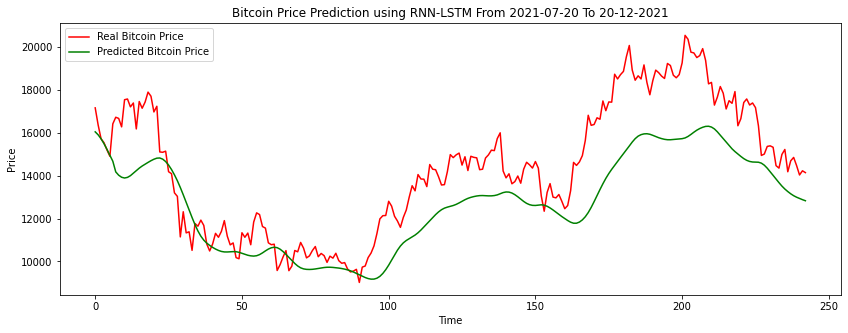

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM From 2021-07-20 To 20-12-2021')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Root Mean Square Error (RMSE):** 

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors) 

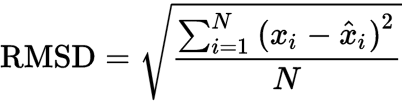

In [ ]:
# RMSE
import math
from sklearn.metrics import mean_squared_error
measure_y_test = np.reshape(Y_test, (Y_test.shape[0], 1))
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
print('Root Mean Square Error (RMSE): ',rmse)

Root Mean Square Error (RMSE):  2070.4959234804023
